<a id='top'></a>

## BigQuery data analysis workshop: Notebook 0

In this notebook we'll use basic python and pandas commands to make sense of the edx data. You should be able to work through this notebook with the dataset you brought with you, or with the provided dataset.

For each command I'll try to include the source that explains more about the command. Most of the pandas commands we will use take a lot of keywords. The references might be handy as your needs grow.

However, before we jump into using pandas, a super-basic python refresher might be handy.

### Contents

[Section 0: Python quick start](#section_0)<br>
[Section 1: Introduction to Pandas](#section_1)<br>
[Section 2: Visualization](#section_2)<br>
[Section 3: More pandas](#section_3)<br>
[Section 4: Dealing with timestamped data](#section_4)<br>
[Section 5: Getting into statistics](#section_5)<br>
[Section 6: Bonus content](#section_6)<br>

<a id='section_0'></a>

### Section 0: Python quick start

In [1]:
#Variables:
#https://www.w3schools.com/python/python_variables.asp

a = 1 #integer
b = 3.5 #float
c = 'python starts counting from 0' #string

print(a, b)
print(c)

1 3.5
python starts counting from 0


In [2]:
#Data structures: https://docs.python.org/3/tutorial/datastructures.html

a_tuple = (34, 'name_', 6.77) #tuple: an ordered group of variables, immutable


a_list = [89, 'course_', 3.145926] #list: an ordered group of variables, mutable
print(a_tuple, a_list)

#selecting/priting a range from the tuples/lists:
print(a_tuple[0:2], a_tuple[1]) #the '[]' at the end of tuple or a list lets you choose a range

#dictionary: key-value pairs
a_dict = {'python':'a language', 'anaconda':'a snake'}
print(a_dict)
print(a_dict['python'])

#creating a range of numbers: https://www.w3schools.com/python/ref_func_range.asp
numbers = range(0,10)
print(numbers)

(34, 'name_', 6.77) [89, 'course_', 3.145926]
(34, 'name_') name_
{'python': 'a language', 'anaconda': 'a snake'}
a language
range(0, 10)


In [33]:
#Loop
#https://www.w3schools.com/python/python_for_loops.asp
#Showing just the 'for' loop for now:
#for i in range(0,10):
#    print(i, i*2, i**2, i/34)

In [34]:
#Loop continued...
#You can also iterate through a list or a tuple:
#for item in a_list:
#    print(item)
    #print(item, item+'_something') #this line will fail. The next line solves it. Why?
    #print(item, str(item)+'_something')

In [3]:
#Function in python
#https://www.w3schools.com/python/python_functions.asp
def square_or_cube(x, option='square'):
    '''option is a keyword here. The function won't work without x, but it'll
    return the square of the input number because of the default value of the option.'''
    if option == 'square':
        return x*x
    elif option == 'cube':
        return x*x*x
    else:
        return 'bad option'
    
#Above, we defined the function "square_or_cube". We are calling the function below:
    
#print(square_or_cube(5))
#print(square_or_cube(2, 'cube'))
#print(square_or_cube(2, option='cube'))
#print(square_or_cube(3, option='sun'))

#### Finger exercises

Uncomment one line at a time, and understand what it does

In [393]:
#a_tuple[-1]
#a_list.append('23')
#a_list
#a_dict
#a_dict['C'] = 'another language'
#a_dict.keys()

<a id='section_1'></a>

### Section 1: Introduction to Pandas:
[(top)](#top)


In the true sprit of MIT, let's dive straight into analyzing some BigQuery edx data files (suitably de-identified and pseudonymized)!

The files are in the 'data' sub folder wrt to the location of the notebook. If you are reading in the files you brought with you, specify the right path for the folder where you put your files.

In [4]:
#our first imports
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) #just so we are able to see all the coluns, and not just a subset...

In [5]:
#Before we can do any analysis, we have to read the files, and we call different pandas methods to read
#different types of files.

#The central data structure in pandas is called a dataframe (same as in R), which is essentially a table (2D)

#Reading in a csv file as a dataframe (and call it pc):
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
pc = pd.read_csv('did_data/di_person_course.csv')

#Reading in a json file as a dataframe (and call it pa):
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html
pa = pd.read_json('did_data/di_problem_analysis.json', lines=True) #Why do we need lines=True?

#Similarly, check out how to read an excel file:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

#### No error message => you managed to read in the files

It's time to find out more about the dataframes you just read in:

In jupyter notebook you always see just the last uncommented line, so if you have multiple uncommented lines, you are seeing the output of the last one.

Uncomment one line at a time and see what it does:

In [6]:
pa.head() #shows first 5 lines
#pa.tail(10) #shows last 10 lines, up to 30
#pc.shape #shows the dimension (row, column) as a tuple
#pc.shape[0] #shows #of rows
#pc.shape[1] #shows #of columns

,attempts,course_id,created,done,grade,item,max_grade,problem_url_name,user_id
0,1,MITx/8.01.2x/3T2016,2016-11-30 03:53:23 UTC,True,0,"[{'answer_id': 'pset_pset5_1_2_1', 'response':...",1,pset_pset5_1,851529239
1,2,MITx/8.01.2x/3T2016,2016-11-26 12:14:17 UTC,True,0,"[{'answer_id': 'pset_pset5_1_2_1', 'response':...",1,pset_pset5_1,168301999
2,7,MITx/8.01.2x/3T2016,2016-11-25 15:33:59 UTC,True,0,"[{'answer_id': 'pset_pset5_1_2_1', 'response':...",1,pset_pset5_1,874889599
3,5,MITx/8.01.2x/3T2016,2016-11-24 00:54:00 UTC,True,0,"[{'answer_id': 'pset_pset5_2_2_1', 'response':...",1,pset_pset5_2,596058900
4,4,MITx/8.01.2x/3T2016,2016-11-23 21:01:49 UTC,True,0,"[{'answer_id': 'pset_pset5_2_2_1', 'response':...",1,pset_pset5_2,388943941


In [7]:
pc.columns #shows all columns

Index(['course_id', 'user_id', 'username', 'registered', 'viewed', 'explored',
       'certified', 'completed', 'grade', 'passing_grade', 'start_time',
       'first_event', 'last_event', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts', 'nforum_votes', 'nforum_endorsed',
       'nforum_threads', 'nforum_comments', 'nforum_pinned', 'roles',
       'nprogcheck', 'nproblem_check', 'nforum_events', 'mode', 'is_active',
       'cert_created_date', 'cert_modified_date', 'cert_status',
       'verified_enroll_time', 'verified_unenroll_time', 'language',
       'language_download', 'language_nevents', 'language_ndiff',
       'ntranscript', 'nshow_answer', 'nvideo', 'nvideos_unique_viewed',
       'nvideos_total_watched', 'nseq_goto', 'nseek_video', 'npause_video',
       'avg_dt', 'sdv_dt', 'max_dt', 'n_dt', 'sum_dt'],
      dtype='object')

In [8]:
list(pa.columns) #You can convert the df.columns object to a list by putting it inside list()

['attempts',
 'course_id',
 'created',
 'done',
 'grade',
 'item',
 'max_grade',
 'problem_url_name',
 'user_id']

#### Getting to know the dataframes better:

Let's ask some basic questions about the datasets and see what kind of commands we could use.

In [9]:
#How many users are there?
pc.user_id.count()

#How many *unique* users?
pc.user_id.nunique()

#Get a list of all the user_id's, and show only first 10:
pc.user_id.tolist()[:10] #pc.user_id.tolist() creates a list from the 'user_id' column; [:10] shows first 10
#elements

pa.attempts.mean() #mean, median, stdev, max, min, summary of columns
pa.attempts.median()
pa.attempts.std()
pa.attempts.max()
pa.attempts.min()
pa.attempts.describe()

#in fact, you can use describe for the whole dataframe:
pa.describe() #non number fields are not incuded. 'user_id' is included as numbers. That could be a problem!

,attempts,grade,max_grade,user_id
count,15201.000000,15201.000000,15201.000000,1.520100e+04
mean,1.886652,1.584830,1.740149,5.544759e+08
std,1.798276,1.065329,0.998867,2.660882e+08
min,1.000000,0.000000,1.000000,1.115895e+08
25%,1.000000,1.000000,1.000000,3.203849e+08
50%,1.000000,1.000000,1.000000,5.343963e+08
75%,2.000000,2.000000,2.000000,8.024914e+08
max,51.000000,6.000000,6.000000,9.999035e+08


#### What about columns containing NaNs?

All empty values in the csv files are initiated with NaN (not admissible number), for example.

In [10]:
pc.nshow_answer.isna().sum() #sum of cells that equal NaN
pc.nshow_answer.notna().sum() #sum of cells that are not NaN

#Also check out fillna(), and dropna()
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

3907

#### Manipulate individual columns, combine columns etc.:


In [11]:
#How to change the datatype of the user_id column to string?
#pa.user_id.apply(str) #what happens if you just do this? pandas returns a copy most of the time...
#pa.user_id = pa.user_id.apply(str) this would set the column as the changed type

#For the pa df, let's create a percentage grade ('pct_grade') for each row:
pa['pct_grade'] = 100.0*pa.grade/pa.max_grade #whenever you can perform algebraic calculations this way, it's
#preferable as it's faster

#Create new columns whenever needed
pa['letter_grade'] = pa.apply(lambda row: 'gt1' if row['attempts']>1 else 'eq1', axis=1)
#There's a lot going on in the above command:
#pandas apply: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
#python lambda: https://www.w3schools.com/python/python_lambda.asp
#https://stackoverflow.com/questions/394809/does-python-have-a-ternary-conditional-operator
pa.tail()

,attempts,course_id,created,done,grade,item,max_grade,problem_url_name,user_id,pct_grade,letter_grade
15196,1,MITx/8.01.2x/3T2016,2016-11-24 03:56:09 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,199463610,100.0,eq1
15197,1,MITx/8.01.2x/3T2016,2016-11-24 03:20:00 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,114741105,100.0,eq1
15198,1,MITx/8.01.2x/3T2016,2016-11-27 01:06:20 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,405976441,100.0,eq1
15199,2,MITx/8.01.2x/3T2016,2016-12-01 01:55:20 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,176279587,100.0,gt1
15200,1,MITx/8.01.2x/3T2016,2016-11-25 08:27:54 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,972628126,100.0,eq1


#### Slicing and dicing the dataframes:

You might want to choose a slice of the dataframe where on particular column satisfies certain condition etc.

In [12]:
#direct slicing, by index:
#pc[10:15] #showing a slice of the dataframe from line 10 to 14

#For example, choose only the problem_analysis rows for problems with max_grade < 3:
pa_max_grade_lt3 = pa[pa.max_grade<3]
print(pa_max_grade_lt3.shape[0])
pa_max_grade_lt3.tail()

#For example, choose only the problem_analysis rows for problems with max_grade < 3 AND attempts>1:
#You can apply that condition on pa_max_grade_lt3, but you can apply that on the original df as well:
pa_both_cond = pa[(pa.max_grade<3) & (pa.attempts>1)]
print(pa_both_cond.shape[0])
pa_both_cond.tail()

12882
4555


,attempts,course_id,created,done,grade,item,max_grade,problem_url_name,user_id,pct_grade,letter_grade
13055,3,MITx/8.01.2x/3T2016,2016-12-31 16:04:57 UTC,True,2,[{'answer_id': 'lore_prep8_20930_d7318fc971554...,2,lore_prep8_20930_d7318fc9715544a9905a56fd6f9a846e,757897390,100.0,gt1
13056,3,MITx/8.01.2x/3T2016,2017-01-06 13:59:28 UTC,True,2,[{'answer_id': 'lore_prep8_20930_d7318fc971554...,2,lore_prep8_20930_d7318fc9715544a9905a56fd6f9a846e,895618543,100.0,gt1
13059,4,MITx/8.01.2x/3T2016,2017-01-08 08:28:50 UTC,True,2,[{'answer_id': 'lore_prep8_20930_d7318fc971554...,2,lore_prep8_20930_d7318fc9715544a9905a56fd6f9a846e,252981945,100.0,gt1
13060,3,MITx/8.01.2x/3T2016,2016-12-23 14:48:36 UTC,True,2,[{'answer_id': 'lore_prep8_20930_d7318fc971554...,2,lore_prep8_20930_d7318fc9715544a9905a56fd6f9a846e,198857140,100.0,gt1
13061,2,MITx/8.01.2x/3T2016,2017-01-03 08:21:26 UTC,True,2,[{'answer_id': 'lore_prep8_20930_d7318fc971554...,2,lore_prep8_20930_d7318fc9715544a9905a56fd6f9a846e,153858003,100.0,gt1


In [13]:
#let's say, we want to pa dataframe slice only for a list of specific probelms, say just 2 of them:
plist = ['lore_prep8_20930_d7318fc9715544a9905a56fd6f9a846e', 'about_ps0_3']
pa_plist = pa[pa.problem_url_name.isin(plist)]
print(pa_plist.shape[0])
print(pa_plist.problem_url_name.unique())
pa_plist.tail()
#Also take a look at the following SO question (at some point...):
#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

137
['lore_prep8_20930_d7318fc9715544a9905a56fd6f9a846e' 'about_ps0_3']


,attempts,course_id,created,done,grade,item,max_grade,problem_url_name,user_id,pct_grade,letter_grade
15196,1,MITx/8.01.2x/3T2016,2016-11-24 03:56:09 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,199463610,100.0,eq1
15197,1,MITx/8.01.2x/3T2016,2016-11-24 03:20:00 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,114741105,100.0,eq1
15198,1,MITx/8.01.2x/3T2016,2016-11-27 01:06:20 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,405976441,100.0,eq1
15199,2,MITx/8.01.2x/3T2016,2016-12-01 01:55:20 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,176279587,100.0,gt1
15200,1,MITx/8.01.2x/3T2016,2016-11-25 08:27:54 UTC,True,6,"[{'answer_id': 'about_ps0_3_2_1', 'response': ...",6,about_ps0_3,972628126,100.0,eq1


#### A realistic task:

Look for the range of the nshow_answer in the pc dataframe, and divide the pa dataframe into 2 slices, one for those with nshow_answer >= avg(nshow_ans), and one for those with nshow_answer < avg(nshow_ans).

Note that these two tables are connected by the user_id. So to achieve our goal, we can take following steps:
1. Find out what the avg. nshow_answer is
2. Find out which user_ids belong to >= and < avg(nshow_answer), and make a list of the user_ids.
3. Fliter the pa dataframe based on those lists

In [14]:
#What unique roles do we find in pc dataframe?
nshowans_mean = pc.nshow_answer.mean()
print('pc nshow_answer avg:',nshowans_mean)

#Make a user_id list for each condition:
pc_geq_avg_list = pc[pc.nshow_answer>=nshowans_mean/2.0].user_id.tolist()
pc_lt_avg_list = pc[pc.nshow_answer<nshowans_mean/2.0].user_id.tolist()


pa_geq_avg = pa[pa.user_id.isin(pc_geq_avg_list)]
pa_lt_avg = pa[pa.user_id.isin(pc_lt_avg_list)]
print('pa_geq_avg size:',pa_geq_avg.shape[0])
print('pa_lt_avg size:',pa_lt_avg.shape[0])

pc nshow_answer avg: 13.0
pa_geq_avg size: 13274
pa_lt_avg size: 1923


<a id='section_2'></a>

### Section 2: Plotting
[(top)](#top)

Basic plotting and more advanced plotting...

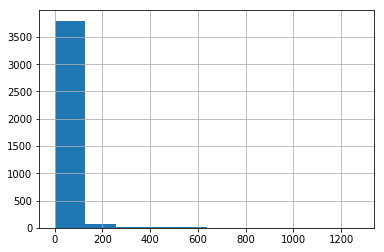

In [17]:
#Pandas allows you to plot histogram very easily!
pc.nshow_answer.hist()
#pc.nshow_answer.hist(bins=50)
#pc.nshow_answer.hist(bins=50,range=[1, 75])

Getting them to look better is more of a challenge. This is using the backend of matplotlib, as described here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

However, there are more powerful data visualization libraries exist these days, and they allow you to make better-looking and interactive plots.

With that in mind, next we import [plotly](https://plot.ly) and start playing with it: [Check here](https://plot.ly/python/reference/) for its extensive reference.

In [16]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

For the simplest of plotly plots, you need to define something a data object, and a layout object. The default layout object is often good enough.

#### Essential elements of a plotly plot

Any plot has two main elements: data and the layout. Below is an example to show how it's organized for plotly.

In [18]:

trace1 = go.Scatter(x=pc.nshow_answer, y=pc.nvideo, mode='markers')
#similarly, it could be go.Bar or go.Histogram, go.Pie, go.Contour...

data = [trace1]
#You can add multiple "traces". Notice that data is a python list. It's a list of plotly graph objects.
#You could also define the trace1 directly inside data = [], as shown in the next example

fig = go.Figure(data=data)
#Here we are providing the data to make the figure. The layout is default. Otherwise, this line would look like:
#fig = go.Figure(data=data, layout=layout)

iplot(fig) #finally, here we are asking it to plot stuff...

#### Interactivity:

Notice that you can
1. Hover over any point to see the corresponding numbers
2. You can click and drag a rectanguar region in the plot to zoom in. Double-click to zoom out.

In [19]:
#this is the example from the plotly reference homepage. I modified it a little bit
data = [
    go.Scatter(                         # all "scatter" attributes: https://plot.ly/python/reference/#scatter
        x=[1, 2, 3],                    # more about "x":  /python/reference/#scatter-x
        y=[3, 1, 6],                    # more about "y":  /python/reference/#scatter-y
        marker=dict(                    # marker is an dict, marker keys: /python/reference/#scatter-marker
            color="rgb(16, 32, 77)"     # more about marker's "color": /python/reference/#scatter-marker-color
        )
    ),
    go.Bar(                         # all "bar" chart attributes: /python/reference/#bar
        x=[1, 2, 3],                # more about "x": /python/reference/#bar-x
        y=[3, 1, 6],                # /python/reference/#bar-y
        name="bar chart example"    # /python/reference/#bar-name
    )
]

layout = go.Layout(             # all "layout" attributes: /python/reference/#layout
    title="simple example",     # more about "layout's" "title": /python/reference/#layout-title
    xaxis=dict(                 # all "layout's" "xaxis" attributes: /python/reference/#layout-xaxis
        title="time"            # more about "layout's" "xaxis's" "title": /python/reference/#layout-xaxis-title
    ),

    #annotations=[
    #    dict(                            # all "annotation" attributes: /python/reference/#layout-annotations
    #        text="simple annotation",    # /python/reference/#layout-annotations-text
    #        x=0,                         # /python/reference/#layout-annotations-x
    #        xref="paper",                # /python/reference/#layout-annotations-xref
    #        y=0,                         # /python/reference/#layout-annotations-y
    #        yref="paper"                 # /python/reference/#layout-annotations-yref
    #    )
    #]

)

figure = go.Figure(data=data, layout=layout)
iplot(figure)

#### Define a function to return you a figure object:

This is helpful when you are on a fishing expedition to explore the relationship between different pairs of quantities:

In [20]:
def plot_pc(df_, qty_x, qty_y, mode_= 'markers', text_=''):
    trace1 = go.Scatter(x=df_[qty_x], y=df_[qty_y], mode=mode_, text=text_)
    data = [trace1]
    fig = go.Figure(data=data)
    return fig

In [21]:
df_ = pc
qty_x = 'nseek_video'
qty_y = 'npause_video'

#iplot(plot_pc(df_, qty_x, qty_y, mode_= 'markers', text_=''))
#iplot(plot_pc(df_, qty_x, qty_y, mode_= 'markers', text_=df_.user_id))

df_ = pa
qty_x = 'attempts'
qty_y = 'grade'
#iplot(plot_pc(df_, qty_x, qty_y, mode_= 'markers', text_=df_.user_id))

<a id='section_3'></a>

### Section 3: Returning to More pandas -- sort, groupby, and merge
[(top)](#top)

#### Sorting:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

In [22]:
pa_lt_avg.sort_values(by='attempts',ascending=False).head(10)

,attempts,course_id,created,done,grade,item,max_grade,problem_url_name,user_id,pct_grade,letter_grade
32,15,MITx/8.01.2x/3T2016,2016-12-12 06:19:38 UTC,True,0,"[{'answer_id': 'pset_pset6_6_2_1', 'response':...",1,pset_pset6_6,874889599,0.0,gt1
1295,15,MITx/8.01.2x/3T2016,2016-12-12 06:19:38 UTC,True,0,"[{'answer_id': 'pset_pset6_5_2_1', 'response':...",5,pset_pset6_5,874889599,0.0,gt1
1045,15,MITx/8.01.2x/3T2016,2016-12-12 06:19:38 UTC,True,0,"[{'answer_id': 'exam_exam2_13_2_1', 'response'...",2,exam_exam2_13,874889599,0.0,gt1
8640,10,MITx/8.01.2x/3T2016,2016-11-25 15:23:13 UTC,True,1,"[{'answer_id': 'ls_ls05_ls05_22_1_2_1', 'respo...",2,ls_ls05_ls05_22_1,874889599,50.0,gt1
15,10,MITx/8.01.2x/3T2016,2016-12-06 18:40:03 UTC,True,0,"[{'answer_id': 'pset_pset5_3_2_1', 'response':...",1,pset_pset5_3,996725461,0.0,gt1
1025,10,MITx/8.01.2x/3T2016,2016-12-06 06:37:14 UTC,True,0,"[{'answer_id': 'exam_exam2_3_2_1', 'response':...",2,exam_exam2_3,874889599,0.0,gt1
38,10,MITx/8.01.2x/3T2016,2016-11-25 15:33:59 UTC,True,0,"[{'answer_id': 'pset_pset6_9_2_1', 'response':...",1,pset_pset6_9,874889599,0.0,gt1
1280,10,MITx/8.01.2x/3T2016,2016-12-06 06:37:14 UTC,True,0,"[{'answer_id': 'pset_pset1_2_2_1', 'response':...",4,pset_pset1_2,874889599,0.0,gt1
1288,10,MITx/8.01.2x/3T2016,2016-11-26 18:59:25 UTC,True,0,"[{'answer_id': 'ls_ls05_ls05_07_1_3_1', 'respo...",4,ls_ls05_ls05_07_1,226438617,0.0,gt1
1103,10,MITx/8.01.2x/3T2016,2016-11-26 19:47:42 UTC,True,0,"[{'answer_id': 'ls_ls05_ls05_16_3_1', 'respons...",2,ls_ls05_ls05_16,226438617,0.0,gt1


#### Groupby and aggregate
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [23]:
#For each user, find out the average grade, max attempts, and min attempts, and sum of all attempts
#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
pa_user_grouped = pa.groupby('user_id').agg({'grade':'mean', 'attempts':['max','min','sum']})
pa_user_grouped.tail()
#related, how to flatten the index?
#https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns

#You could also group-by problem names, or anything that occurs multiple times...

grade attempts        
               mean      max min sum
user_id                             
996725461  1.642857       10   1  43
998526213  0.857143        2   1   9
998879186  1.843750        6   1  60
999334211  1.000000        7   7   7
999903517  1.000000        2   1   5

In [24]:

pa_user_grouped['attempts_diff'] = pa_user_grouped['attempts']['max'] - pa_user_grouped['attempts']['min']
pa_user_grouped.tail()

grade attempts         attempts_diff
               mean      max min sum              
user_id                                           
996725461  1.642857       10   1  43             9
998526213  0.857143        2   1   9             1
998879186  1.843750        6   1  60             5
999334211  1.000000        7   7   7             0
999903517  1.000000        2   1   5             1

#### Merge dataframes on unique keys:

So we have pc, which has user_id, and now pa_user_grouped, which also has user_id.
We can merge these dataframes on user_id
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [25]:
df_merged = pc.merge(pa_user_grouped, on='user_id',how='inner')
df_merged.tail()

/Users/anindyaroy/Sites/fun/venv/lib/python3.6/site-packages/pandas/core/reshape/merge.py:522: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



,course_id,user_id,username,registered,viewed,explored,certified,completed,grade,passing_grade,start_time,first_event,last_event,nevents,ndays_act,nplay_video,nchapters,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,roles,nprogcheck,nproblem_check,nforum_events,mode,is_active,cert_created_date,cert_modified_date,cert_status,verified_enroll_time,verified_unenroll_time,language,language_download,language_nevents,language_ndiff,ntranscript,nshow_answer,nvideo,nvideos_unique_viewed,nvideos_total_watched,nseq_goto,nseek_video,npause_video,avg_dt,sdv_dt,max_dt,n_dt,sum_dt,"(grade, mean)","(attempts, max)","(attempts, min)","(attempts, sum)","(attempts_diff, )"
602,MITx/8.01.2x/3T2016,237949826,99321c4e-4ad2-4dd5-80f0-8f131825ac17,True,True,False,False,False,0.00,0.6,2016-11-30 17:35:24 UTC,2016-11-30 17:36:22.411792 UTC,2018-02-23 17:31:14.880683 UTC,499.0,18.0,72.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Student,0.0,2.0,0.0,audit,0,2017-01-25 17:29:06,2017-01-25 17:29:06,audit_notpassing,NaN,NaN,en,0.0,39.0,1.0,0.0,2.0,72.0,17.0,0.204819,31.0,5.0,70.0,9.424480,43.635749,256.059174,443.0,9917.042319,1.000000,1,1,1,0
603,MITx/8.01.2x/3T2016,469226371,4eb304a0-1a4e-4027-bae2-27c16c606825,True,True,True,False,True,1.00,0.6,2016-11-06 11:43:35 UTC,2016-11-24 00:49:07.21021 UTC,2017-10-09 02:44:09.847137 UTC,7529.0,69.0,293.0,8.0,2.0,0.0,0.0,0.0,2.0,0.0,Student,0.0,876.0,0.0,audit,1,2017-01-25 17:12:54,2017-01-25 17:12:54,audit_passing,NaN,NaN,en,0.0,319.0,1.0,0.0,374.0,293.0,82.0,0.987952,605.0,82.0,270.0,21.511660,47.620101,298.102195,7099.0,149220.455793,1.737705,11,1,172,10
604,MITx/8.01.2x/3T2016,722490314,0b653e10-07b2-4e3d-a4c9-517d1c295483,True,True,True,False,True,0.63,0.6,2016-10-20 15:48:40 UTC,2016-11-24 00:00:00 UTC,2017-01-17 14:13:46.381959 UTC,2432.0,31.0,167.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Student,0.0,347.0,0.0,audit,1,2017-01-25 17:19:36,2017-01-25 17:19:36,audit_passing,NaN,NaN,en,0.0,95.0,1.0,0.0,0.0,167.0,69.0,0.831325,279.0,86.0,124.0,20.658604,51.619514,299.910078,2312.0,51912.304112,1.692308,3,1,50,2
605,MITx/8.01.2x/3T2016,154489820,148f4704-a323-48c1-b62e-4e6f785796d0,True,True,True,False,True,0.94,0.6,2016-11-21 14:31:42 UTC,2016-11-24 00:00:00 UTC,2018-02-27 04:14:04.481985 UTC,4834.0,55.0,305.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,Student,0.0,722.0,0.0,audit,1,2017-01-25 17:22:17,2017-01-25 17:22:17,audit_passing,NaN,NaN,en,0.0,191.0,1.0,0.0,117.0,305.0,61.0,0.734940,382.0,284.0,260.0,14.352191,42.843196,299.928425,4564.0,78961.653779,1.672727,7,1,104,6
606,MITx/8.01.2x/3T2016,938529836,46e1b26f-0424-476c-b48f-b8360b7481af,True,True,True,False,False,0.32,0.6,2016-10-06 10:41:25 UTC,2016-11-24 00:00:00 UTC,2017-06-18 12:37:09.897444 UTC,1778.0,34.0,132.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Student,0.0,374.0,0.0,audit,1,2017-01-25 17:25:43,2017-01-25 17:25:43,audit_notpassing,NaN,NaN,en,0.0,115.0,1.0,0.0,47.0,132.0,59.0,0.710843,172.0,35.0,122.0,23.288401,56.327277,298.987985,1568.0,40931.735567,1.772727,12,1,108,11


In [26]:
#if you have to access the combined columns:
df_merged[('grade', 'mean')].sum()

901.1194135922059

In [27]:
#This is inconvenient, and we can flatten the levels for the grouped dataframe for easier manipulation:
pa_user_grouped.columns = ['grade_mean','attempts_max', 'attempts_min','attempts_sum','attempts_diff']
#leave out the grouping column...
pa_user_grouped.tail()

,grade_mean,attempts_max,attempts_min,attempts_sum,attempts_diff
user_id,,,,,
996725461,1.642857,10,1,43,9
998526213,0.857143,2,1,9,1
998879186,1.843750,6,1,60,5
999334211,1.000000,7,7,7,0
999903517,1.000000,2,1,5,1


In [28]:
#Let's try mergeing again!
df_merged = pc.merge(pa_user_grouped, on='user_id',how='inner')
df_merged.tail()
#Much better!

,course_id,user_id,username,registered,viewed,explored,certified,completed,grade,passing_grade,start_time,first_event,last_event,nevents,ndays_act,nplay_video,nchapters,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,roles,nprogcheck,nproblem_check,nforum_events,mode,is_active,cert_created_date,cert_modified_date,cert_status,verified_enroll_time,verified_unenroll_time,language,language_download,language_nevents,language_ndiff,ntranscript,nshow_answer,nvideo,nvideos_unique_viewed,nvideos_total_watched,nseq_goto,nseek_video,npause_video,avg_dt,sdv_dt,max_dt,n_dt,sum_dt,grade_mean,attempts_max,attempts_min,attempts_sum,attempts_diff
602,MITx/8.01.2x/3T2016,237949826,99321c4e-4ad2-4dd5-80f0-8f131825ac17,True,True,False,False,False,0.00,0.6,2016-11-30 17:35:24 UTC,2016-11-30 17:36:22.411792 UTC,2018-02-23 17:31:14.880683 UTC,499.0,18.0,72.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Student,0.0,2.0,0.0,audit,0,2017-01-25 17:29:06,2017-01-25 17:29:06,audit_notpassing,NaN,NaN,en,0.0,39.0,1.0,0.0,2.0,72.0,17.0,0.204819,31.0,5.0,70.0,9.424480,43.635749,256.059174,443.0,9917.042319,1.000000,1,1,1,0
603,MITx/8.01.2x/3T2016,469226371,4eb304a0-1a4e-4027-bae2-27c16c606825,True,True,True,False,True,1.00,0.6,2016-11-06 11:43:35 UTC,2016-11-24 00:49:07.21021 UTC,2017-10-09 02:44:09.847137 UTC,7529.0,69.0,293.0,8.0,2.0,0.0,0.0,0.0,2.0,0.0,Student,0.0,876.0,0.0,audit,1,2017-01-25 17:12:54,2017-01-25 17:12:54,audit_passing,NaN,NaN,en,0.0,319.0,1.0,0.0,374.0,293.0,82.0,0.987952,605.0,82.0,270.0,21.511660,47.620101,298.102195,7099.0,149220.455793,1.737705,11,1,172,10
604,MITx/8.01.2x/3T2016,722490314,0b653e10-07b2-4e3d-a4c9-517d1c295483,True,True,True,False,True,0.63,0.6,2016-10-20 15:48:40 UTC,2016-11-24 00:00:00 UTC,2017-01-17 14:13:46.381959 UTC,2432.0,31.0,167.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Student,0.0,347.0,0.0,audit,1,2017-01-25 17:19:36,2017-01-25 17:19:36,audit_passing,NaN,NaN,en,0.0,95.0,1.0,0.0,0.0,167.0,69.0,0.831325,279.0,86.0,124.0,20.658604,51.619514,299.910078,2312.0,51912.304112,1.692308,3,1,50,2
605,MITx/8.01.2x/3T2016,154489820,148f4704-a323-48c1-b62e-4e6f785796d0,True,True,True,False,True,0.94,0.6,2016-11-21 14:31:42 UTC,2016-11-24 00:00:00 UTC,2018-02-27 04:14:04.481985 UTC,4834.0,55.0,305.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,Student,0.0,722.0,0.0,audit,1,2017-01-25 17:22:17,2017-01-25 17:22:17,audit_passing,NaN,NaN,en,0.0,191.0,1.0,0.0,117.0,305.0,61.0,0.734940,382.0,284.0,260.0,14.352191,42.843196,299.928425,4564.0,78961.653779,1.672727,7,1,104,6
606,MITx/8.01.2x/3T2016,938529836,46e1b26f-0424-476c-b48f-b8360b7481af,True,True,True,False,False,0.32,0.6,2016-10-06 10:41:25 UTC,2016-11-24 00:00:00 UTC,2017-06-18 12:37:09.897444 UTC,1778.0,34.0,132.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Student,0.0,374.0,0.0,audit,1,2017-01-25 17:25:43,2017-01-25 17:25:43,audit_notpassing,NaN,NaN,en,0.0,115.0,1.0,0.0,47.0,132.0,59.0,0.710843,172.0,35.0,122.0,23.288401,56.327277,298.987985,1568.0,40931.735567,1.772727,12,1,108,11


In [29]:
#Notice that we used how='inner' --> that only kept the users who were present in pa dataframe,
#a much smaller number
print(df_merged.shape[0])

#let's choose all the users (from pc):
df_merged_left = pc.merge(pa_user_grouped, on='user_id',how='left')
print(df_merged_left.shape[0])


607
6060


<a id='section_4'></a>

### Section 4: Dealing with timestamped data
[(top)](#top)

Timestamped data often create a lot of confusion -- it's not a decimal system, and depends on specific calendar and timezones. While learning about the in-built python and pandas modules on datetime/timedelta/timezone is annoying and exhausting, it's much better than having to write our own!

Let's try to understand the created column. For example, we can try to find the max and the min created time
for each user.

In [30]:
#For each user, find out the average grade, max attempts, and min attempts, and sum of all attempts
#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
pa_user_grouped = pa.groupby('user_id').agg({'created':['max','min']})
pa_user_grouped.tail()
#related, how to flatten the index?
#https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns

#You could also group-by problem names, or anything that occurs multiple times...

created                         
                               max                      min
user_id                                                    
996725461  2016-12-06 21:39:18 UTC  2016-12-06 18:07:18 UTC
998526213  2016-11-29 23:25:38 UTC  2016-11-29 23:25:38 UTC
998879186  2017-01-30 07:30:38 UTC  2016-11-24 13:39:22 UTC
999334211  2016-12-01 18:00:32 UTC  2016-12-01 18:00:32 UTC
999903517  2016-11-25 05:20:43 UTC  2016-11-25 05:20:42 UTC

In [284]:
#what about the difference between created_max and created_min?
#(You will get an error when you run this. But the error is instructive)
#pa_user_grouped['active_duration'] = pa_user_grouped['created']['max'] - pa_user_grouped['created']['min']

In [31]:
#So, while pandas is very powerful in interpreting timestamps, you can't get the duration this way...
#For that we have to convert the created string as a 'datetime' object:
pa['created'] = pd.to_datetime(pa['created'])

pa_user_grouped = pa.groupby('user_id').agg({'created':['max','min']})
pa_user_grouped.tail()

created                          
                                max                       min
user_id                                                      
996725461 2016-12-06 21:39:18+00:00 2016-12-06 18:07:18+00:00
998526213 2016-11-29 23:25:38+00:00 2016-11-29 23:25:38+00:00
998879186 2017-01-30 07:30:38+00:00 2016-11-24 13:39:22+00:00
999334211 2016-12-01 18:00:32+00:00 2016-12-01 18:00:32+00:00
999903517 2016-11-25 05:20:43+00:00 2016-11-25 05:20:42+00:00

In [32]:
#Now, the datetime objects can be subtracted from each other, to give a "time_delta" object
pa_user_grouped['active_duration'] = pa_user_grouped['created']['max'] - pa_user_grouped['created']['min']
pa_user_grouped.tail()

created                            active_duration
                                max                       min                 
user_id                                                                       
996725461 2016-12-06 21:39:18+00:00 2016-12-06 18:07:18+00:00  0 days 03:32:00
998526213 2016-11-29 23:25:38+00:00 2016-11-29 23:25:38+00:00  0 days 00:00:00
998879186 2017-01-30 07:30:38+00:00 2016-11-24 13:39:22+00:00 66 days 17:51:16
999334211 2016-12-01 18:00:32+00:00 2016-12-01 18:00:32+00:00  0 days 00:00:00
999903517 2016-11-25 05:20:43+00:00 2016-11-25 05:20:42+00:00  0 days 00:00:01

In [36]:
#You can even do regular arithmetic ops on timedelta objects:
print(pa_user_grouped.active_duration.mean())
print(pa_user_grouped.active_duration.max())
print(pa_user_grouped.active_duration.std())

19 days 21:44:23.714991
236 days 21:52:01
24 days 08:13:04.817137


In [33]:
#Let's say we want to plot the sum of grade of students as a function of active_duration
#What if we want to convert the 'active_duration' into a fractional days column?
pa_user_grade_sum = pa.groupby('user_id').agg({'grade':'sum'})
#Merge this with pa_user_grouped active_duration columns:
pa_user_grade_active = pa_user_grouped[['active_duration']].merge(pa_user_grade_sum, on='user_id')
pa_user_grade_active.tail(5)

#Also note the merge command above. We used double square brackets for pa_user_grouped. Why?
#https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

/Users/anindyaroy/Sites/fun/venv/lib/python3.6/site-packages/pandas/core/reshape/merge.py:522: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



,"(active_duration, )",grade
user_id,,
996725461,0 days 03:32:00,23
998526213,0 days 00:00:00,6
998879186,66 days 17:51:16,59
999334211,0 days 00:00:00,1
999903517,0 days 00:00:01,4


In [34]:
#flatten columns, like before:
pa_user_grade_active.columns = ['active_duration','grade_sum']
pa_user_grade_active.tail()

,active_duration,grade_sum
user_id,,
996725461,0 days 03:32:00,23
998526213,0 days 00:00:00,6
998879186,66 days 17:51:16,59
999334211,0 days 00:00:00,1
999903517,0 days 00:00:01,4


In [35]:
iplot(plot_pc(pa_user_grade_active, qty_x='active_duration', qty_y='grade_sum', 
              mode_= 'markers', text_=df_.user_id))
#Now this is all garbage -- we don't know what's going on with the timedelta format
#Here is more on plotting timeseries on plotly: https://plot.ly/python/time-series/
#It doesn't seem to be able to deal with timedelta objects

In [36]:
#instead, what we can do is to create a "fractional days" column from the timedelta object ('active_duration')

pa_user_grade_active['frac_days_duration'] = pa_user_grade_active['active_duration'].dt.total_seconds()/86400.
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html

pa_user_grade_active.tail()

,active_duration,grade_sum,frac_days_duration
user_id,,,
996725461,0 days 03:32:00,23,0.147222
998526213,0 days 00:00:00,6,0.000000
998879186,66 days 17:51:16,59,66.743935
999334211,0 days 00:00:00,1,0.000000
999903517,0 days 00:00:01,4,0.000012


In [37]:
iplot(plot_pc(pa_user_grade_active, qty_x='frac_days_duration', qty_y='grade_sum', 
              mode_= 'markers', text_=pa_user_grade_active.index))
#This looks much better, right! Not to mention that it looks like you have exponential return on your
#grade if you just stick around! :)

#Also note that some of the numbers look suspicious!

#### Let's see if we can plot problem submissions grouped by dates

This is a standard way to inspect overall activity in the course. We may want to group them by
weeks instead of days, or a time period that makes sense given your context.

In [38]:
pa['created_date'] = pa.created.dt.date
pa.tail()
pa_date_group = pa.groupby('created_date').agg({'user_id':'count','attempts':'sum'})
#remember -- user_id is an integer, and calling 'sum' would produce funny results!
pa_date_group.tail()

,user_id,attempts
created_date,,
2017-10-21,5,6
2017-11-02,1,1
2017-11-09,7,9
2017-11-10,2,3
2018-03-25,4,4


In [39]:
#and let's call the plotly function:
#iplot(plot_pc(pa_date_group, qty_x='created_date', qty_y='user_id', 
#              mode_= 'markers', text_=pa_date_group.index))

#Now, this will run into trouble! It's because the created_date is an index, and we can't call the index
#the way we defined the plotly function.

#A simple way out could be to copy the created_date column into another column, say, copy_date:
#pa_date_group['copy_date'] = pa_date_group['created_date'] #won't work
#pa_date_group['copy_date'] = pa_date_group.created_date #won't work
pa_date_group['copy_date'] = pa_date_group.index #and see that we need to access it as index

#Now try to plot again:
iplot(plot_pc(pa_date_group, qty_x='copy_date', qty_y='user_id', 
              mode_= 'markers', text_=pa_date_group.index))
#for the mode_ keyword, also try 'lines+markers', and 'lines'
#This makes sense, as it was a fall course...

<a id='section_5'></a>

### Section 5: Getting into statistics: correlation, least-square fitting etc.
[(top)](#top)

We show below an example of basic correlation using pandas, and and example of least-square fitting from [statsmodels](https://www.statsmodels.org/stable/index.html). Another very useful statistics package is [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

#### Simple correlation

In [44]:
#pandas is well equipped to handle standard correlation (Pearson, Spearman etc.)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html#pandas.Series.corr

pa.attempts.corr(pa.grade) #default is pearson
#or, you can write this as
#pa['attempts'].corr(pa['grade']):
#The second form is suitable for handling the pandas series programmatically, as shown in the example below:

0.06214611055845909

In [45]:
#You can use this to find a correlations between a bunch of quantity-pairs:
from itertools import combinations
qtys = ['nvideo','nseek_video','npause_video','grade','nproblem_check','nshow_answer']

pairs_list = list(combinations(qtys,2))
#https://stackoverflow.com/questions/942543/operation-on-every-pair-of-element-in-a-list
print(pairs_list)

for pair in pairs_list:
    print('Corr. between {} and {} is {}'.format(pair[0],pair[1], pc[pair[0]].corr(pc[pair[1]])))

[('nvideo', 'nseek_video'), ('nvideo', 'npause_video'), ('nvideo', 'grade'), ('nvideo', 'nproblem_check'), ('nvideo', 'nshow_answer'), ('nseek_video', 'npause_video'), ('nseek_video', 'grade'), ('nseek_video', 'nproblem_check'), ('nseek_video', 'nshow_answer'), ('npause_video', 'grade'), ('npause_video', 'nproblem_check'), ('npause_video', 'nshow_answer'), ('grade', 'nproblem_check'), ('grade', 'nshow_answer'), ('nproblem_check', 'nshow_answer')]
Corr. between nvideo and nseek_video is 0.776807755333
Corr. between nvideo and npause_video is 0.969989361769
Corr. between nvideo and grade is 0.358293725152
Corr. between nvideo and nproblem_check is 0.263684343092
Corr. between nvideo and nshow_answer is 0.476920352041
Corr. between nseek_video and npause_video is 0.673617382784
Corr. between nseek_video and grade is 0.279849363417
Corr. between nseek_video and nproblem_check is 0.236469540145
Corr. between nseek_video and nshow_answer is 0.407741616233
Corr. between npause_video and grade

#### Simple fitting:

we often need them -- having an example handy is good.

It's kind of hard to see in the cells below: the symbol between the dependent and the independent variable(s) is
*tilde*, and not '-'

In [46]:
from statsmodels.formula.api import ols #ols is ordinary least square
#https://www.statsmodels.org/stable/index.html #this is a very useful stats module

In [47]:
model_1 = ols("grade ~  nvideo", pc).fit()
#model_1 = ols("nvideo ~  npause_video", pc).fit()
#model_1 = ols("nvideo ~  npause_video - 1", pc).fit() #if you want no intercept...
#model_1 = ols("grade ~  npause_video + nproblem_check", pc).fit()
#if you want linear fit with multiple variables
model_1.summary()

#Question: How would you go about non-linear fit?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     351.4
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.96e-73
Time:                        14:20:14   Log-Likelihood:                 83.140
No. Observations:                2388   AIC:                            -162.3
Df Residuals:                    2386   BIC:                            -150.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0597      0.005     12.126      0.000       0.050       0.069
nvideo         0.0005   2.49e-05     18.746      0.000       0.000       0.001
==============================================================================
Omnibus:                     1245.587   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8781.149
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      11.070   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='section_6'></a>

### Section 6: Bonus content
##### stuff that I feel I should talk about, but couldn't find a better spot in the rest of the notebook!
[(top)](#top)



#### Drop column(s) from a dataframe, copy some columns to another dataframe...

In [48]:
pa_dropped = pa.drop(['item','attempts'], axis=1)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
#if you want to drop the column from your original dataframe, you need "inplace=True"
#axis=1 means going along columns. axis=0 means going along rows -- and the list we provided are not in the
#indices along there...

pa_dropped.tail()

,course_id,created,done,grade,max_grade,problem_url_name,user_id,pct_grade,letter_grade,created_date
15196,MITx/8.01.2x/3T2016,2016-11-24 03:56:09,True,6,6,about_ps0_3,199463610,100.0,eq1,2016-11-24
15197,MITx/8.01.2x/3T2016,2016-11-24 03:20:00,True,6,6,about_ps0_3,114741105,100.0,eq1,2016-11-24
15198,MITx/8.01.2x/3T2016,2016-11-27 01:06:20,True,6,6,about_ps0_3,405976441,100.0,eq1,2016-11-27
15199,MITx/8.01.2x/3T2016,2016-12-01 01:55:20,True,6,6,about_ps0_3,176279587,100.0,gt1,2016-12-01
15200,MITx/8.01.2x/3T2016,2016-11-25 08:27:54,True,6,6,about_ps0_3,972628126,100.0,eq1,2016-11-25


In [49]:
#Briefly mentioned this above: but here is how we can copy columns of a dataframe into another:
columns_to_copy = ['user_id','nvideo','npause_video','nseek_video']
pc_video = pc[columns_to_copy]
pc_video.tail()

,user_id,nvideo,npause_video,nseek_video
6055,375346242,0.0,0.0,0.0
6056,679433286,0.0,0.0,0.0
6057,427054152,0.0,0.0,0.0
6058,945837132,12.0,12.0,0.0
6059,864048205,0.0,0.0,0.0


#### Create a new dataframe from raw data

In [50]:
#Make a new dataframe from raw-data:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
#We reuse the correlation example that we just saw in the previous section:
pairs_list = [('nvideo', 'nseek_video'), ('nvideo', 'npause_video'), ('nvideo', 'grade'), 
              ('nvideo', 'nproblem_check'), ('nvideo', 'nshow_answer'), ('nseek_video', 'npause_video'), 
              ('nseek_video', 'grade'), ('nseek_video', 'nproblem_check'), ('nseek_video', 'nshow_answer'), 
              ('npause_video', 'grade'), ('npause_video', 'nproblem_check'), ('npause_video', 'nshow_answer'), 
              ('grade', 'nproblem_check'), ('grade', 'nshow_answer'), ('nproblem_check', 'nshow_answer')]

rows_list = [] #initiate a new list
for pair in pairs_list:
    rows_list.append([pair[0],pair[1], pc[pair[0]].corr(pc[pair[1]]) ])

corr_df = pd.DataFrame.from_records(rows_list, columns=['qty_1','qty_2', 'pearson_r'])
corr_df

,qty_1,qty_2,pearson_r
0,nvideo,nseek_video,0.776808
1,nvideo,npause_video,0.969989
2,nvideo,grade,0.358294
3,nvideo,nproblem_check,0.263684
4,nvideo,nshow_answer,0.476920
5,nseek_video,npause_video,0.673617
6,nseek_video,grade,0.279849
7,nseek_video,nproblem_check,0.236470
8,nseek_video,nshow_answer,0.407742
9,npause_video,grade,0.387188


#### Save a dataframe as a file (csv, json etc.)

In a sense, this is the inverse command of read_(X). X=csv, json etc.

In [51]:
corr_df.to_csv('did_data/corr_df_1.csv')
corr_df.to_csv('did_data/corr_df_2.csv', index=None) #Check out what happens when you have the index keyword
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

corr_df.to_json('did_data/corr_df_1.json')
corr_df.to_json('did_data/corr_df_2.json', orient='records')
corr_df.to_json('did_data/corr_df_3.json', orient='records', lines=True)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html
#Find out what the orient and lines keywords do...
#For reference, the third kind is what we get as problem_analysis.json or course_axis.json

#### Access the nested data in the dataframe read from json files:

We take the problem_analysis file as the example:

In [52]:
#Going through the dataframe line-by-line
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html
for index, row in pa[:5].iterrows():
    print(row['item']) #the entire 'item' list
    print(row['item'][0])    #which has only 1 element, aceessing by [0]
    print(row['item'][0]['answer_id']) #...and that element is a dictionary, so we can use a key to get the value


[{u'hint': u'', u'correctness': u'incorrect', u'correct_bool': False, u'msg': u'', u'response': u'"((L*M)/2)*hati"', u'answer_id': u'pset_pset5_1_2_1'}]
{u'hint': u'', u'correctness': u'incorrect', u'correct_bool': False, u'msg': u'', u'response': u'"((L*M)/2)*hati"', u'answer_id': u'pset_pset5_1_2_1'}
pset_pset5_1_2_1
[{u'hint': u'', u'correctness': u'incorrect', u'correct_bool': False, u'msg': u'', u'response': u'"-L/4* hati"', u'answer_id': u'pset_pset5_1_2_1'}]
{u'hint': u'', u'correctness': u'incorrect', u'correct_bool': False, u'msg': u'', u'response': u'"-L/4* hati"', u'answer_id': u'pset_pset5_1_2_1'}
pset_pset5_1_2_1
[{u'hint': u'', u'correctness': u'incorrect', u'correct_bool': False, u'msg': u'', u'response': u'"0"', u'answer_id': u'pset_pset5_1_2_1'}]
{u'hint': u'', u'correctness': u'incorrect', u'correct_bool': False, u'msg': u'', u'response': u'"0"', u'answer_id': u'pset_pset5_1_2_1'}
pset_pset5_1_2_1
[{u'hint': u'', u'correctness': u'incorrect', u'correct_bool': False, u

#### How to flatten the nested files?

Again, falling back on the problem_analysis file to go through that process.
(I'm sure there are many ways to achieve this goal...)

In [53]:
#First define all the nested items in this file:
nested_items = ['answer_id', 'response', 'correctness', 'correct_bool', 'msg', 'hint']

#get all the pa.item data dumped into a list:
pa_item_list = pa.item.tolist()
item_list = []

for item in pa_item_list:
    item_list.append(item[0]) #here we are making a list of dictionaries.

item_df = pd.DataFrame.from_records(item_list) #we are making a dataframe from the raw data.

item_df.tail()

,answer_id,correct_bool,correctness,hint,msg,npoints,response
15196,about_ps0_3_2_1,True,correct,,,NaN,"""G*M*m/r^2"""
15197,about_ps0_3_2_1,True,correct,,,NaN,"""G*M*m/r^2"""
15198,about_ps0_3_2_1,True,correct,,,NaN,"""G*M*m/r^2"""
15199,about_ps0_3_2_1,True,correct,,,NaN,"""G*M*m/r^2"""
15200,about_ps0_3_2_1,True,correct,,,NaN,"""G*(M*m)/r^2"""


In [54]:
#We are almost there! Now we merge this new dataframe with the original dataframe on index:
pa_flattened = pa.merge(item_df,validate='1:1', how='inner', left_index=True, right_index=True)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

pa_flattened.tail()

,attempts,course_id,created,done,grade,item,max_grade,problem_url_name,user_id,pct_grade,letter_grade,created_date,answer_id,correct_bool,correctness,hint,msg,npoints,response
15196,1,MITx/8.01.2x/3T2016,2016-11-24 03:56:09,True,6,"[{u'hint': u'', u'correctness': u'correct', u'...",6,about_ps0_3,199463610,100.0,eq1,2016-11-24,about_ps0_3_2_1,True,correct,,,NaN,"""G*M*m/r^2"""
15197,1,MITx/8.01.2x/3T2016,2016-11-24 03:20:00,True,6,"[{u'hint': u'', u'correctness': u'correct', u'...",6,about_ps0_3,114741105,100.0,eq1,2016-11-24,about_ps0_3_2_1,True,correct,,,NaN,"""G*M*m/r^2"""
15198,1,MITx/8.01.2x/3T2016,2016-11-27 01:06:20,True,6,"[{u'hint': u'', u'correctness': u'correct', u'...",6,about_ps0_3,405976441,100.0,eq1,2016-11-27,about_ps0_3_2_1,True,correct,,,NaN,"""G*M*m/r^2"""
15199,2,MITx/8.01.2x/3T2016,2016-12-01 01:55:20,True,6,"[{u'hint': u'', u'correctness': u'correct', u'...",6,about_ps0_3,176279587,100.0,gt1,2016-12-01,about_ps0_3_2_1,True,correct,,,NaN,"""G*M*m/r^2"""
15200,1,MITx/8.01.2x/3T2016,2016-11-25 08:27:54,True,6,"[{u'hint': u'', u'correctness': u'correct', u'...",6,about_ps0_3,972628126,100.0,eq1,2016-11-25,about_ps0_3_2_1,True,correct,,,NaN,"""G*(M*m)/r^2"""


### This concludes the intro. notebook on using pandas/plotly for edx data anlaysis and visualization.
[(top)](#top)

For questions/comments, email anindyar@mit.edu